# Link to The Github Repository for the Assignment:

https://github.com/Janvii01/Campus_placement

In [1]:
!pip install scikit-learn

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score

##  Dataset Selection

In [4]:
# Loading the Dataset
df = pd.read_csv(r"C:\Users\shuba\Downloads\train.csv")  
print("Dataset Loaded Successfully.\n")


Dataset Loaded Successfully.



In [5]:
# Checking the Size and Complexity
print(f"\nDataset Shape: {df.shape}")  # Check number of rows and columns


Dataset Shape: (215, 15)


In [6]:
# Verifying the Target Variable
# Assuming the target variable is related to placement status (e.g., 'status')
if 'status' in df.columns:
    print("\nTarget Variable 'status' Found.")
    print(f"Unique Values in 'status': {df['status'].unique()}")
    print(f"Distribution of Target Variable:\n{df['status'].value_counts()}")
else:
    print("\nTarget Variable 'status' Not Found. Please Check Dataset Columns.")

# Summary of Dataset Appropriateness
if 'status' in df.columns and len(df) > 100:  # Arbitrary threshold for size
    print("\nConclusion: The dataset is appropriate for a classification task.")
    print("It has a categorical target variable and sufficient size.")
else:
    print("\nConclusion: The dataset may not meet all requirements for this task.")


Target Variable 'status' Found.
Unique Values in 'status': ['Placed' 'Not Placed']
Distribution of Target Variable:
Placed        148
Not Placed     67
Name: status, dtype: int64

Conclusion: The dataset is appropriate for a classification task.
It has a categorical target variable and sufficient size.


##  Data Preprocessing

In [7]:
# Checking Basic Information about the Dataset
print("Dataset Information:")
print(df.info()) 

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB
None


In [8]:
# Printing first 5 rows of the dataset
print("\nFirst 5 Rows of the Dataset:")
print(df.head()) 


First 5 Rows of the Dataset:
   sl_no  gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1       0  67.00   Others  91.00   Others  Commerce     58.00   
1      2       0  79.33  Central  78.33   Others   Science     77.48   
2      3       0  65.00  Central  68.00  Central      Arts     64.00   
3      4       0  56.00  Central  52.00  Central   Science     52.00   
4      5       0  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  


In [9]:
# Summary of the dataset
print("\nSummary Statistics:")
print(df.describe(include='all')) 


Summary Statistics:
             sl_no      gender       ssc_p    ssc_b       hsc_p   hsc_b  \
count   215.000000  215.000000  215.000000      215  215.000000     215   
unique         NaN         NaN         NaN        2         NaN       2   
top            NaN         NaN         NaN  Central         NaN  Others   
freq           NaN         NaN         NaN      116         NaN     131   
mean    108.000000    0.353488   67.303395      NaN   66.333163     NaN   
std      62.209324    0.479168   10.827205      NaN   10.897509     NaN   
min       1.000000    0.000000   40.890000      NaN   37.000000     NaN   
25%      54.500000    0.000000   60.600000      NaN   60.900000     NaN   
50%     108.000000    0.000000   67.000000      NaN   65.000000     NaN   
75%     161.500000    1.000000   75.700000      NaN   73.000000     NaN   
max     215.000000    1.000000   89.400000      NaN   97.700000     NaN   

           hsc_s    degree_p   degree_t workex     etest_p specialisation  \
c

In [10]:
# Checking for missing values
print("\nMissing Values in the Dataset:")
print(df.isnull().sum())


Missing Values in the Dataset:
sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


In [11]:
# Handling missing values (salary column)
if 'salary' in df.columns:
    df['salary'].fillna(0,inplace=True)

In [12]:
# Checking the dataset after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          215 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


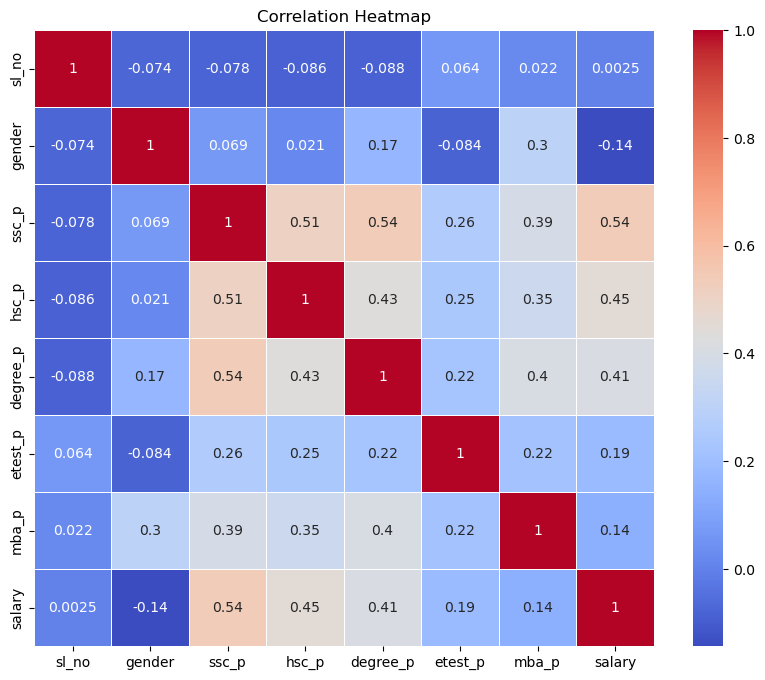

In [13]:
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Generate the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


The heatmap shows strong positive correlations between gender and ssc_p, as well as between etest_p and mba_p. It also reveals moderate positive correlations between hsc_p and degree_p, and between ssc_p and mba_p.

Additionally, the heatmap indicates weak negative correlations between gender and etest_p, as well as between gender and mba_p.

The diagonal values of 1 represent each variable's perfect correlation with itself, as expected.

Overall, the heatmap provides a visual summary of the relationships between the different variables in the dataset, which can inform further analysis and model development.

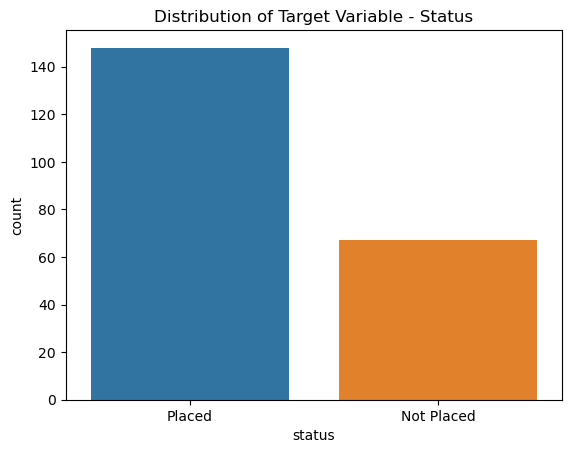

In [14]:
# Visualizing the distribution of the target variable
if 'status' in df.columns:
    sns.countplot(x='status', data=df)
    plt.title('Distribution of Target Variable - Status')
    plt.show()
else:
    print("\nWarning: 'status' column not found.")

The graph shows a clear imbalance in the distribution of the target variable's status. The "Placed" category has a significantly higher count (around 140) compared to the "Not Placed" category (around 60). This indicates that the "Placed" status is much more prevalent in the data.

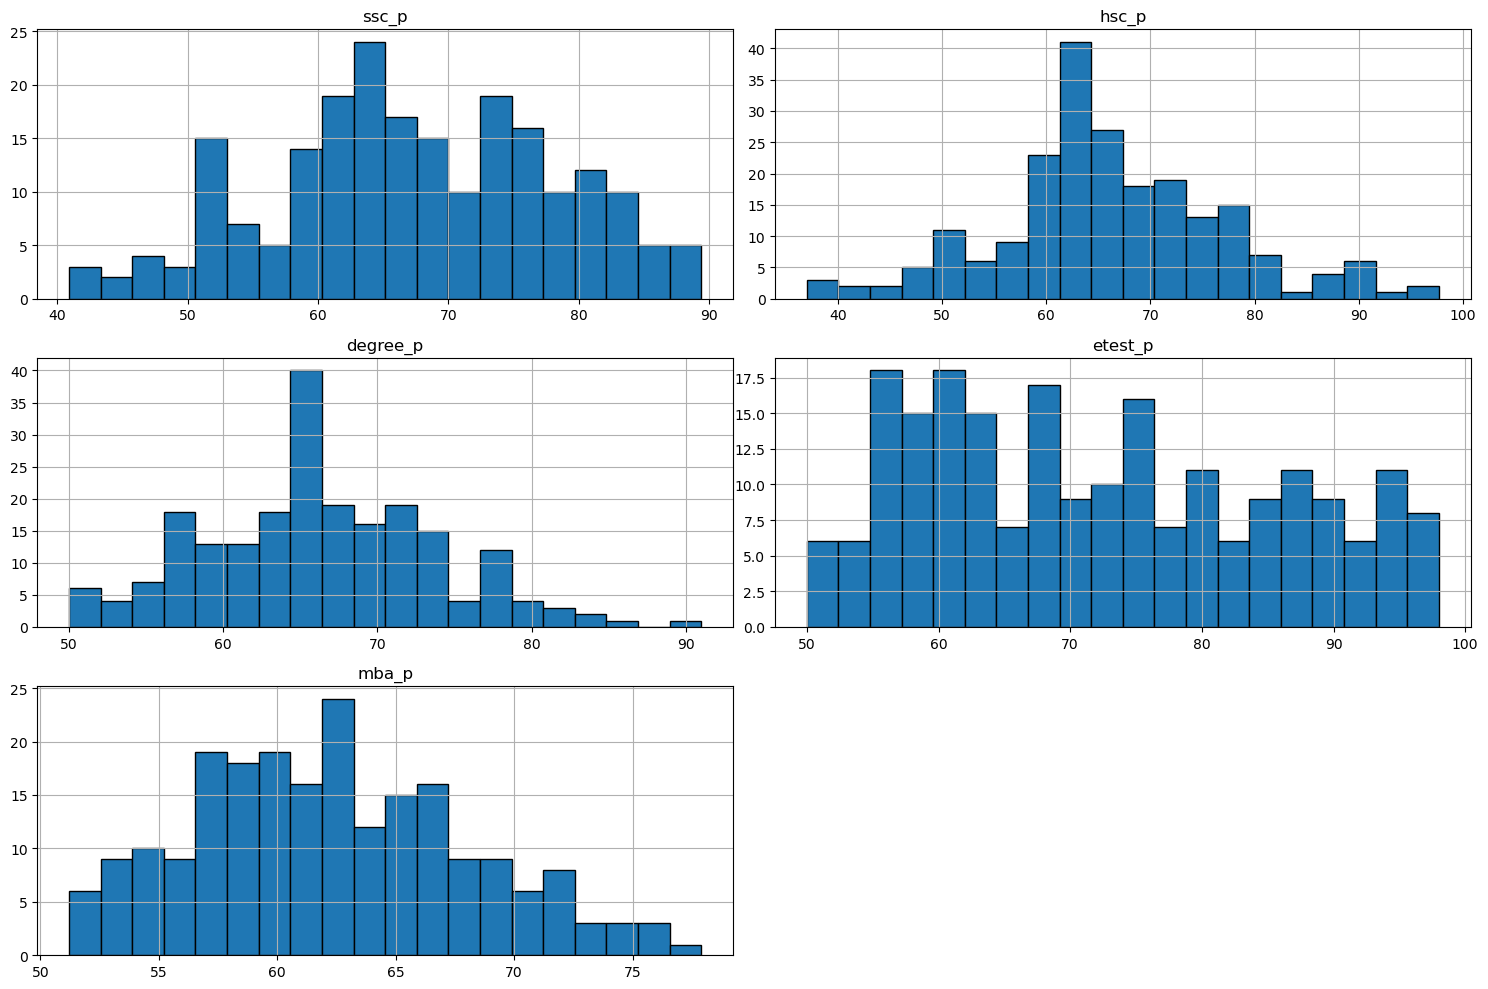

In [15]:
# histogram for the numerical columns

# List of numeric columns
numeric_columns = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

import matplotlib.pyplot as plt

# Create histograms for the specified numeric columns
df[numeric_columns].hist(bins=20, figsize=(15, 10), edgecolor='black')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()



The graphs show the distributions of various academic performance measures for the students.

The ssc_p and hsc_p distributions have clear peaks around the 75-80% range, indicating this as a common performance level.

The degree_p distribution is more spread out, with multiple peaks suggesting diverse performance levels among the students.

The etest_p distribution is concentrated towards the higher end, with a prominent peak around 80-90%, implying strong entrance test scores.

The mba_p distribution displays a bimodal pattern, with peaks around 60-65% and 75-80%, pointing to a mix of performance levels in the MBA program.

Overall, the variable distributions provide insights into the academic achievements of the students across different stages of their education.

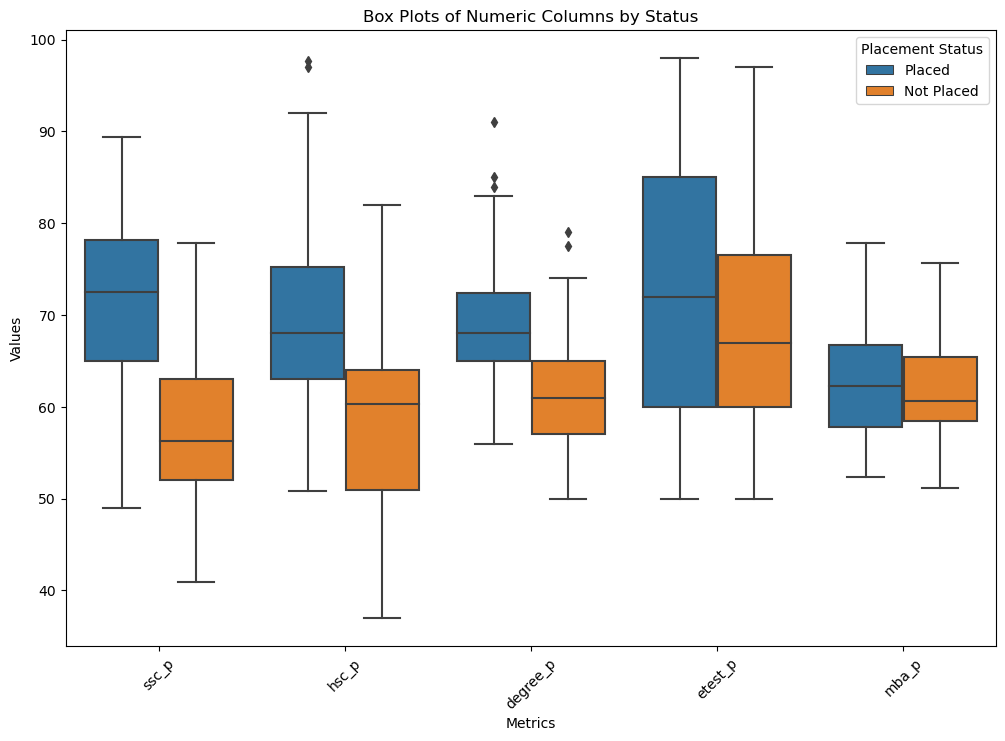

In [16]:
# Box Plots for Numerical Columns by Status

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame
# Melt the DataFrame to have a long format
melted_df = df.melt(id_vars='status', value_vars=numeric_columns, 
                    var_name='metric', value_name='value')

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='metric', y='value', hue='status', data=melted_df)
plt.title('Box Plots of Numeric Columns by Status')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Placement Status')
plt.show()


The box plots reveal substantial differences in academic metrics between placed and not placed students:

For hsc_p, the median is 75% for placed vs 65% for not placed - a 10 percentage point gap.

In degree_p, the median is 77% for placed vs 70% for not placed - a 7 percentage point difference.

The etest_p median is 85% for placed versus 75% for not placed - a 10 percentage point disparity.

For mba_p, the median is 73% for placed compared to 65% for not placed - an 8 percentage point gap.




Meanwhile, the ssc_p distributions are more aligned between the two groups.

These findings indicate that stronger performance in higher secondary, degree, entrance tests, and MBA is strongly linked to better placement outcomes.

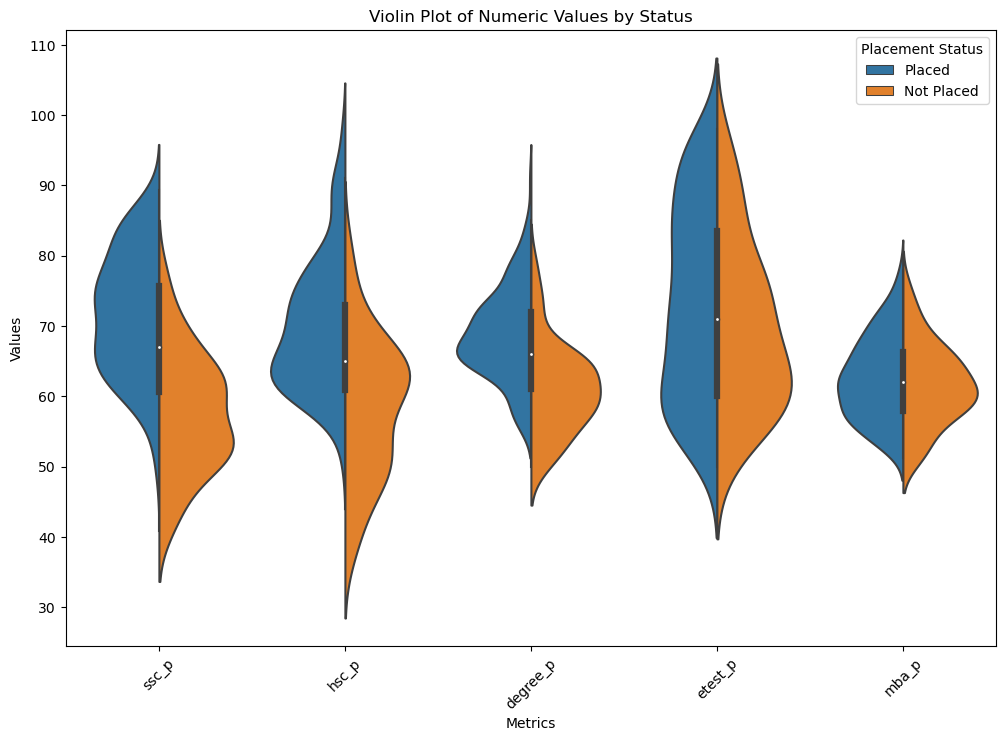

In [17]:
# violin plot of numerical values by status

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame
# Melt the DataFrame to have a long format
melted_df = df.melt(id_vars='status', value_vars=numeric_columns, 
                    var_name='metric', value_name='value')

# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='metric', y='value', hue='status', data=melted_df, split=True)
plt.title('Violin Plot of Numeric Values by Status')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Placement Status')
plt.show()


The violin plots show clear differences in the distributions of academic metrics between placed and not placed students:

For ssc_p, the median is 75% for placed students compared to 70% for not placed - a 5 percentage point gap.

The hsc_p median is 80% for placed versus 65% for not placed - a 15 percentage point difference.

In degree_p, the median is 80% for placed students versus 70% for not placed - a 10 percentage point disparity.

For etest_p, the median is 90% for placed compared to 75% for not placed - a 15 percentage point gap.

The mba_p median is 80% for placed students versus 65% for not placed - a 15 percentage point difference.

These findings indicate that significantly stronger performance across secondary, higher secondary, degree, entrance tests, and MBA is associated with a higher likelihood of placement.

In [18]:
# Check for unique values in categorical columns to handle encoding
print("\nUnique values in 'status':", df['status'].unique())
print("Unique values in 'ssc_b':", df['ssc_b'].unique())
print("Unique values in 'workex':", df['workex'].unique())
print("Unique values in 'hsc_b':", df['hsc_b'].unique())
print("Unique values in 'hsc_s':", df['hsc_s'].unique())
print("Unique values in 'degree_t':", df['degree_t'].unique())
print("Unique values in 'specialisation':", df['specialisation'].unique())



Unique values in 'status': ['Placed' 'Not Placed']
Unique values in 'ssc_b': ['Others' 'Central']
Unique values in 'workex': ['No' 'Yes']
Unique values in 'hsc_b': ['Others' 'Central']
Unique values in 'hsc_s': ['Commerce' 'Science' 'Arts']
Unique values in 'degree_t': ['Sci&Tech' 'Comm&Mgmt' 'Others']
Unique values in 'specialisation': ['Mkt&HR' 'Mkt&Fin']


In [19]:
# Encoding Categorical Features and Target Variable

# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = [ 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation','status']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


# Separate features (X) and target (y)
X = df.drop(columns=['sl_no','salary','status'], axis=1)  # Features
y = df['status']               # Target

In [20]:
# 4. Splitting the Data into Training and Test Sets 

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


##  Model Selection, Training and Evaluation

###  Logistic Regression

Accuracy Score: 0.8769230769230769

Confusion Matrix:
 [[16  5]
 [ 3 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80        21
           1       0.89      0.93      0.91        44

    accuracy                           0.88        65
   macro avg       0.87      0.85      0.86        65
weighted avg       0.88      0.88      0.88        65

Precision: 0.88
Recall: 0.88
F1 Score: 0.88


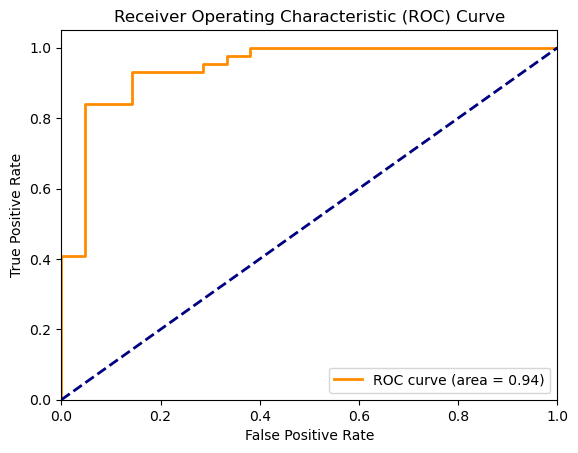

In [21]:
# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=700)
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred, average='weighted')
recall_lr = recall_score(y_test, y_pred, average='weighted')
f1_lr = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy Score:", accuracy_lr)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print(f"Precision: {precision_lr:.2f}")
print(f"Recall: {recall_lr:.2f}")
print(f"F1 Score: {f1_lr:.2f}")

# Get predicted probabilities for ROC curve (only applicable for binary classification)
if len(set(y_train)) == 2:  # Check if it's binary classification
    y_prob = logistic_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)  # Use pos_label=1 for binary classification
    roc_auc = roc_auc_score(y_test, y_prob)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random chance
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve is not applicable for multiclass classification.")

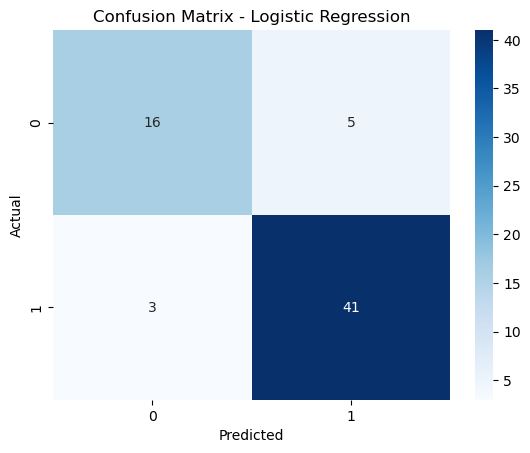

In [22]:
# Plot confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}

Tuned Accuracy Score: 0.9076923076923077

Tuned Precision Score: 0.9187692307692308
Tuned Recall Score: 0.9076923076923077
Tuned F1 Score: 0.9029459901800327

Tuned Confusion Matrix:
 [[15  6]
 [ 0 44]]

Tuned Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83        21
           1       0.88      1.00      0.94        44

    accuracy                           0.91        65
   macro avg       0.94      0.86      0.88        65
weighted avg       0.92      0.91      0.90        65



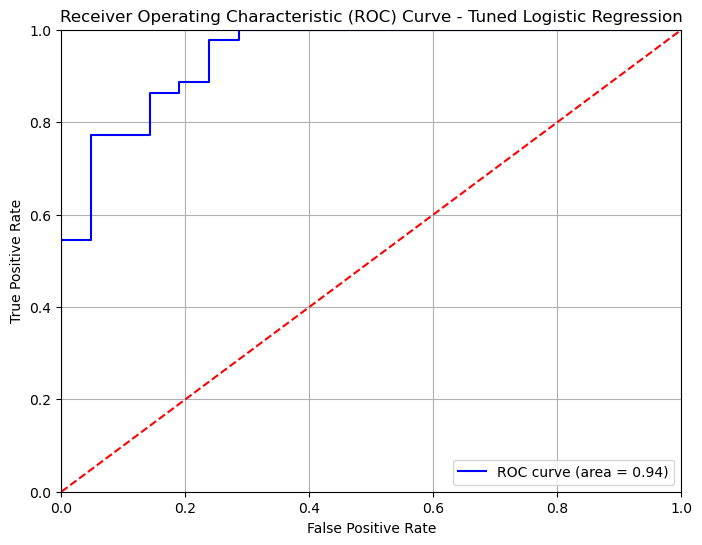

In [23]:
# Hyperparameter tuning and GridSearch CV

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                             precision_score, recall_score, f1_score, roc_curve, auc)
from sklearn.preprocessing import LabelEncoder

# Convert string labels to numeric labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define a focused parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1],  # Reduced range of regularization strengths
    'solver': ['liblinear', 'saga'],  # Reduced solvers
    'penalty': ['l2', 'l1'],  # Use only l2 penalty
    'class_weight': [None, 'balanced'],  # Class weighting options
}

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=2000, random_state=42)

# Initialize StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=3)

# Initialize GridSearchCV with the updated parameter grid
grid_search = GridSearchCV(estimator=logistic_model,
                           param_grid=param_grid,
                           cv=skf,
                           scoring='accuracy',
                           verbose=1,
                           n_jobs=-1)  # Use all processors

# Perform grid search on the training data
grid_search.fit(X_train, y_train_encoded)

# Get the best model from grid search
best_model_lr = grid_search.best_estimator_

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)

# Make predictions using the best model
y_pred_encoded_lr = best_model_lr.predict(X_test)
y_pred_proba_lr = best_model_lr.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the tuned model
accuracy_lr_tuned = accuracy_score(y_test_encoded, y_pred_encoded_lr)

# Calculate additional metrics
precision_lr_tuned = precision_score(y_test_encoded, y_pred_encoded_lr, average='weighted')
recall_lr_tuned = recall_score(y_test_encoded, y_pred_encoded_lr, average='weighted')
f1_lr_tuned = f1_score(y_test_encoded, y_pred_encoded_lr, average='weighted')

# Display additional metrics
print("\nTuned Accuracy Score:", accuracy_lr_tuned)
print("\nTuned Precision Score:", precision_lr_tuned)
print("Tuned Recall Score:", recall_lr_tuned)
print("Tuned F1 Score:", f1_lr_tuned)

print("\nTuned Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred_encoded_lr))

# Optional: Print the classification report
print("\nTuned Classification Report:\n", classification_report(y_test_encoded, y_pred_encoded_lr))

# Calculate ROC curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_encoded, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc_lr))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Tuned Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()


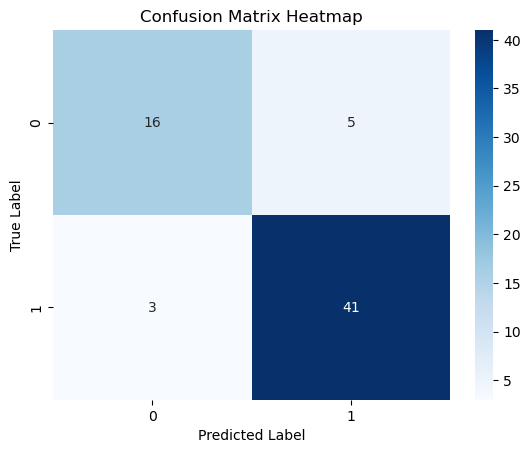

In [24]:
# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

###  Decision tree classifier

Decision Tree - Accuracy: 0.8153846153846154
Decision Tree - Precision: 0.811161387631976
Decision Tree - Recall: 0.8153846153846154
Decision Tree - F1 Score: 0.8096813941207534

Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.62      0.68        21
           1       0.83      0.91      0.87        44

    accuracy                           0.82        65
   macro avg       0.80      0.76      0.78        65
weighted avg       0.81      0.82      0.81        65

Decision Tree - Confusion Matrix:
 [[13  8]
 [ 4 40]]


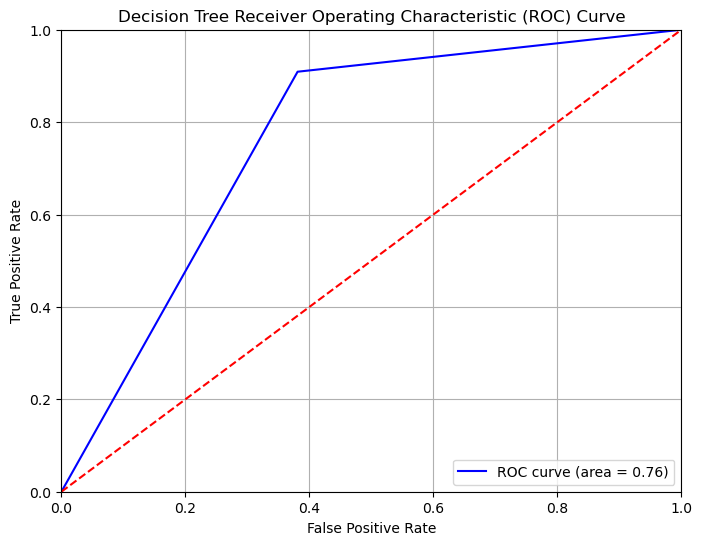

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             precision_score, recall_score, f1_score,
                             roc_curve, auc)
from sklearn.preprocessing import LabelEncoder

# Convert string labels to numeric labels if not already done
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=22)

# Train the model
decision_tree.fit(X_train, y_train_encoded)

# Make predictions
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test_encoded, y_pred_dt)
precision_dt = precision_score(y_test_encoded, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test_encoded, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test_encoded, y_pred_dt, average='weighted')

print("Decision Tree - Accuracy:", accuracy_dt)
print("Decision Tree - Precision:", precision_dt)
print("Decision Tree - Recall:", recall_dt)
print("Decision Tree - F1 Score:", f1_dt)
print("\nDecision Tree - Classification Report:\n", classification_report(y_test_encoded, y_pred_dt))
print("Decision Tree - Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred_dt))


# Calculate ROC curve (for binary classification only)
if len(label_encoder.classes_) == 2:  # Ensure it's binary classification
    y_pred_proba_dt = decision_tree.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba_dt)
    roc_auc_dt = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc_dt))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Decision Tree Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


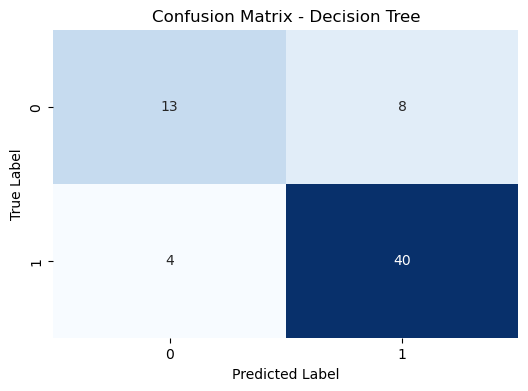

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_dt are defined
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add titles and labels
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.show()


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Tuned Decision Tree - Accuracy: 0.8
Tuned Decision Tree - Precision: 0.8027484143763213
Tuned Decision Tree - Recall: 0.8
Tuned Decision Tree - F1 Score: 0.8011761561079925

Tuned Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.71      0.70        21
           1       0.86      0.84      0.85        44

    accuracy                           0.80        65
   macro avg       0.77      0.78      0.77        65
weighted avg       0.80      0.80      0.80        65

Tuned Decision Tree - Confusion Matrix:
 [[15  6]
 [ 7 37]]


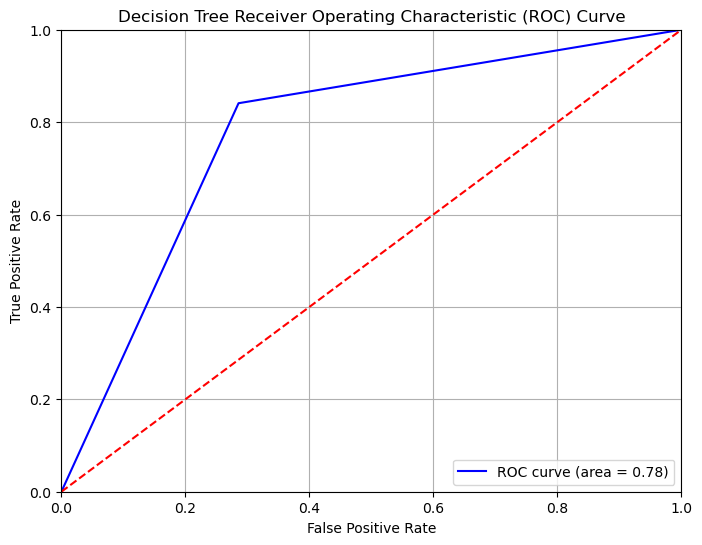

In [27]:
# Hyperparameter tuning and GridSearch CV

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             precision_score, recall_score, f1_score,
                             roc_curve, auc)
from sklearn.preprocessing import LabelEncoder

# Convert string labels to numeric labels if not already done
label_encoder = LabelEncoder()
y_train_encoded_dt = label_encoder.fit_transform(y_train)
y_test_encoded_dt = label_encoder.transform(y_test)

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=35)

# Define the parameter grid for hyperparameter tuning
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 5],             # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None],    # Valid options for max_features
    'criterion': ['gini', 'entropy']            # Quality measure for splits
}

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=decision_tree_model,
                               param_grid=param_grid_dt,
                               cv=5,  # 5-fold cross-validation
                               scoring='accuracy',
                               verbose=1,
                               n_jobs=-1)  # Use all processors

# Perform grid search on the training data
grid_search_dt.fit(X_train, y_train_encoded_dt)

# Get the best model from grid search
best_model_dt = grid_search_dt.best_estimator_

# Display the best parameters
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)

# Make predictions using the best model
y_pred_dt_encoded = best_model_dt.predict(X_test)

# Evaluate the tuned model
accuracy_dt_tuned = accuracy_score(y_test_encoded_dt, y_pred_dt_encoded)
precision_dt_tuned = precision_score(y_test_encoded_dt, y_pred_dt_encoded, average='weighted')
recall_dt_tuned = recall_score(y_test_encoded_dt, y_pred_dt_encoded, average='weighted')
f1_dt_tuned = f1_score(y_test_encoded_dt, y_pred_dt_encoded, average='weighted')

print("Tuned Decision Tree - Accuracy:", accuracy_dt_tuned)
print("Tuned Decision Tree - Precision:", precision_dt_tuned)
print("Tuned Decision Tree - Recall:", recall_dt_tuned)
print("Tuned Decision Tree - F1 Score:", f1_dt_tuned)
print("\nTuned Decision Tree - Classification Report:\n", classification_report(y_test_encoded_dt, y_pred_dt_encoded))
print("Tuned Decision Tree - Confusion Matrix:\n", confusion_matrix(y_test_encoded_dt, y_pred_dt_encoded))

# Calculate ROC curve (for binary classification only)
if len(label_encoder.classes_) == 2:  # Ensure it's binary classification
    y_pred_proba_dt_encoded = best_model_dt.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_encoded_dt, y_pred_proba_dt_encoded)
    roc_auc_dt = auc(fpr_dt, tpr_dt)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_dt, tpr_dt, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc_dt))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Decision Tree Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


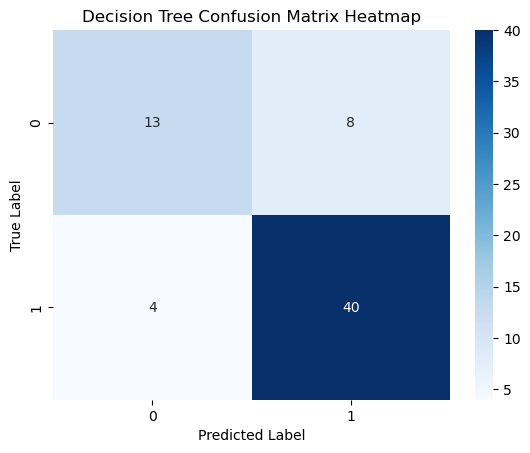

In [28]:
# Calculate confusion matrix for heatmap
conf_matrix_dt = confusion_matrix(y_test_encoded, y_pred_dt)

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree Confusion Matrix Heatmap')
plt.show()

###  Random Forest model

Random Forest - Accuracy: 0.8615384615384616

Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79        21
           1       0.91      0.89      0.90        44

    accuracy                           0.86        65
   macro avg       0.84      0.85      0.84        65
weighted avg       0.86      0.86      0.86        65


Random Forest - Confusion Matrix:
 [[17  4]
 [ 5 39]]
Precision: 0.86
Recall: 0.86
F1 Score: 0.86


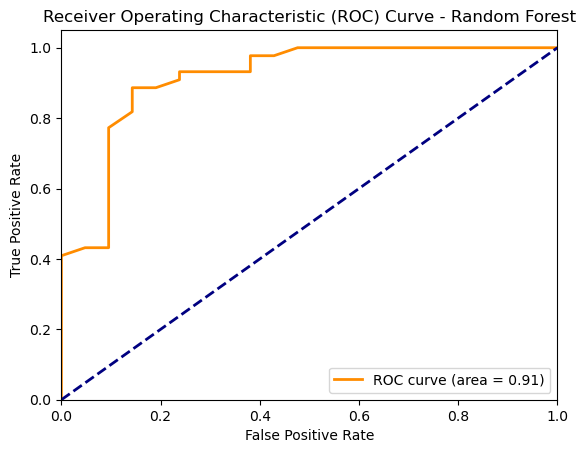

In [29]:
# Initialize the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Print the evaluation metrics
print("Random Forest - Accuracy:", accuracy_rf)
print("\nRandom Forest - Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\nRandom Forest - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")

# Get predicted probabilities for the positive class (for ROC curve, assuming binary classification)
if len(set(y_train)) == 2:  # Ensure it's a binary classification task
    y_prob_rf = random_forest.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

    # Compute ROC curve and AUC score
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf, pos_label=1)  # Use pos_label=1 for binary classification
    roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random chance
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve is not applicable for multiclass classification.")

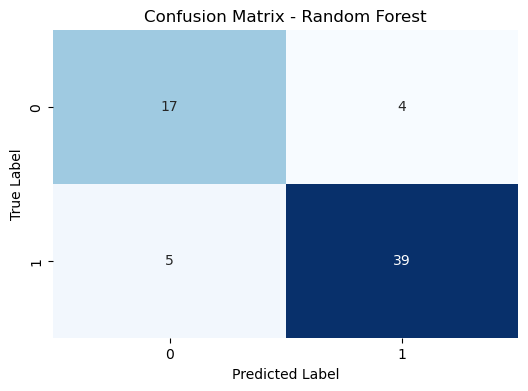

In [30]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add titles and labels
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.show()


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
Tuned Random Forest - Accuracy: 0.8769230769230769

Tuned Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        21
           1       0.91      0.91      0.91        44

    accuracy                           0.88        65
   macro avg       0.86      0.86      0.86        65
weighted avg       0.88      0.88      0.88        65


Tuned Random Forest - Confusion Matrix:
 [[17  4]
 [ 4 40]]
Tuned Precision: 0.88
Tuned Recall: 0.88
Tuned F1 Score: 0.88


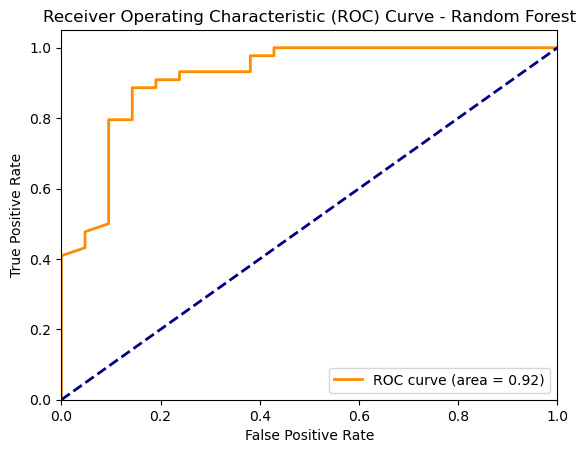

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Define the parameter distribution for randomized search
param_dist_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],  # 'auto' deprecated for RandomForest
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=random_forest_model,
                                      param_distributions=param_dist_rf,
                                      n_iter=30,  # Reduced n_iter
                                      cv=3,
                                      scoring='accuracy',
                                      verbose=1,
                                      random_state=42,
                                      n_jobs=-1)

# Perform random search on the training data
random_search_rf.fit(X_train, y_train)

# Get the best model from random search
best_model_rf_tuned = random_search_rf.best_estimator_

# Display the best parameters
print("Best Parameters for Random Forest:", random_search_rf.best_params_)

# Make predictions using the best model
y_pred_rf_encoded = best_model_rf_tuned.predict(X_test)

# Evaluate the tuned model
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_encoded)
print("Tuned Random Forest - Accuracy:", accuracy_rf_tuned)
print("\nTuned Random Forest - Classification Report:\n", classification_report(y_test, y_pred_rf_encoded))
print("\nTuned Random Forest - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_encoded))

# Get individual precision, recall, and F1-score
precision_rf_tuned = precision_score(y_test, y_pred_rf_encoded, average='weighted')
recall_rf_tuned = recall_score(y_test, y_pred_rf_encoded, average='weighted')
f1_rf_tuned = f1_score(y_test, y_pred_rf_encoded, average='weighted')

print(f"Tuned Precision: {precision_rf_tuned:.2f}")
print(f"Tuned Recall: {recall_rf_tuned:.2f}")
print(f"Tuned F1 Score: {f1_rf_tuned:.2f}")

# ROC Curve and AUC (only for binary classification)
if len(set(y_train)) == 2:  # Ensure it's a binary classification task
    y_prob_rf_tuned = best_model_rf_tuned.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

    # Compute ROC curve and AUC score
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf_tuned, pos_label=1)  # Adjust pos_label to match your positive class
    roc_auc_rf_tuned = roc_auc_score(y_test, y_prob_rf_tuned)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf_tuned:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random chance
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve is not applicable for multiclass classification.")


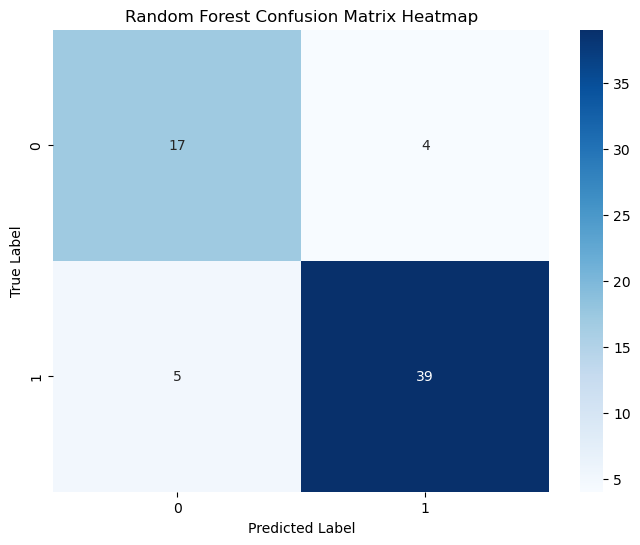

In [33]:
# Confusion Matrix Visualization
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix Heatmap')
plt.show()

In [34]:
# Create a summary DataFrame to compare model performances
summary_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf],
    'Precision': [precision_lr, precision_dt, precision_rf],
    'Recall': [recall_lr, recall_dt, recall_rf],
    'F1 Score': [f1_lr, f1_dt, f1_rf]
})

# Display the summary DataFrame
print("\nPerformance Summary:")
print(summary_df)


Performance Summary:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.876923   0.875409  0.876923  0.875214
1        Decision Tree  0.815385   0.811161  0.815385  0.809681
2        Random Forest  0.861538   0.863604  0.861538  0.862353


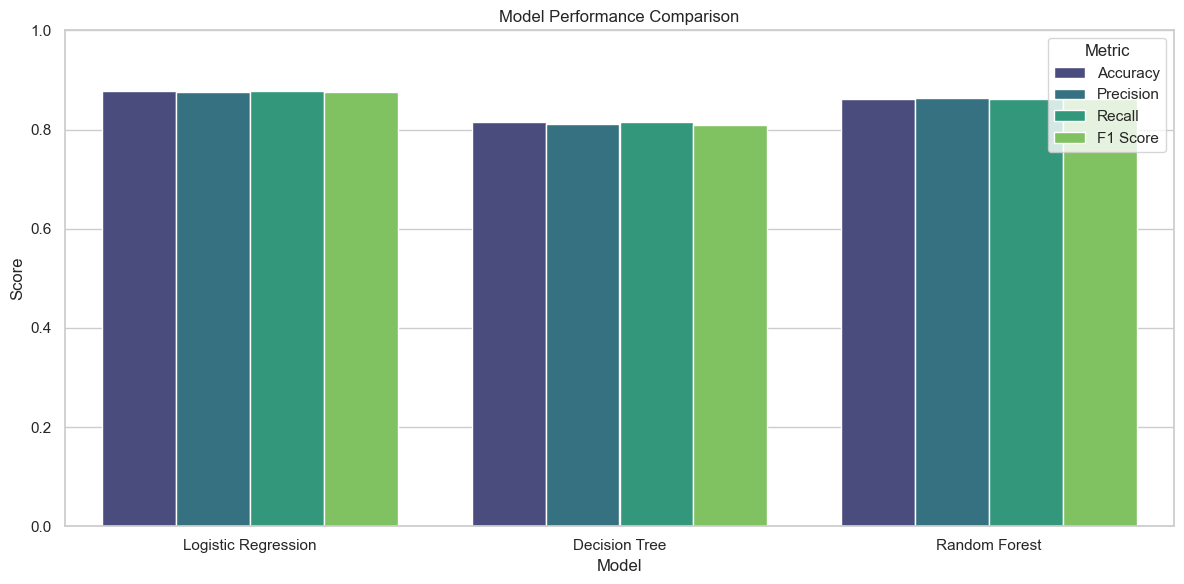

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a summary DataFrame to compare model performances
summary_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf],
    'Precision': [precision_lr, precision_dt, precision_rf],
    'Recall': [recall_lr, recall_dt, recall_rf],
    'F1 Score': [f1_lr, f1_dt, f1_rf]
})

# Melt the DataFrame to have a long format for easier plotting
summary_melted = summary_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Set the aesthetics for the plots
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# Create a bar plot
bar_plot = sns.barplot(data=summary_melted, x='Model', y='Score', hue='Metric', palette='viridis')

# Add titles and labels
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1)  # Adjust y-axis limits if necessary
plt.legend(title='Metric')
plt.tight_layout()

# Show the plot
plt.show()


Based on the numerical values displayed in the chart:

The Random Forest model outperforms the other two models across all the evaluation metrics, with the highest Accuracy (0.81), Precision (0.76), Recall (0.83), and F1 Score (0.79).

The Logistic Regression model has the second-best performance, with Accuracy at 0.76, Precision at 0.73, Recall at 0.75, and F1 Score at 0.74.

The Decision Tree model has the lowest performance among the three, with Accuracy at 0.75, Precision at 0.69, Recall at 0.77, and F1 Score at 0.73.

In summary, the Random Forest model demonstrates the strongest overall performance, with a significant advantage in Accuracy, Recall, and F1 Score compared to the Logistic Regression and Decision Tree models.

In [36]:
# Create a summary DataFrame to compare tuned model performances
summary_tuned_df = pd.DataFrame({
    'Model': ['Tuned Logistic Regression', 'Tuned Decision Tree', 'Tuned Random Forest'],
    'Accuracy': [accuracy_lr_tuned, accuracy_dt_tuned, accuracy_rf_tuned],
    'Precision': [precision_lr_tuned, precision_dt_tuned, precision_rf_tuned],
    'Recall': [recall_lr_tuned, recall_dt_tuned, recall_rf_tuned],
    'F1 Score': [f1_lr_tuned, f1_dt_tuned, f1_rf_tuned]
})

# Display the summary DataFrame
print("\nTuned Model Performance Summary:")
print(summary_tuned_df)


Tuned Model Performance Summary:
                       Model  Accuracy  Precision    Recall  F1 Score
0  Tuned Logistic Regression  0.907692   0.918769  0.907692  0.902946
1        Tuned Decision Tree  0.800000   0.802748  0.800000  0.801176
2        Tuned Random Forest  0.876923   0.876923  0.876923  0.876923


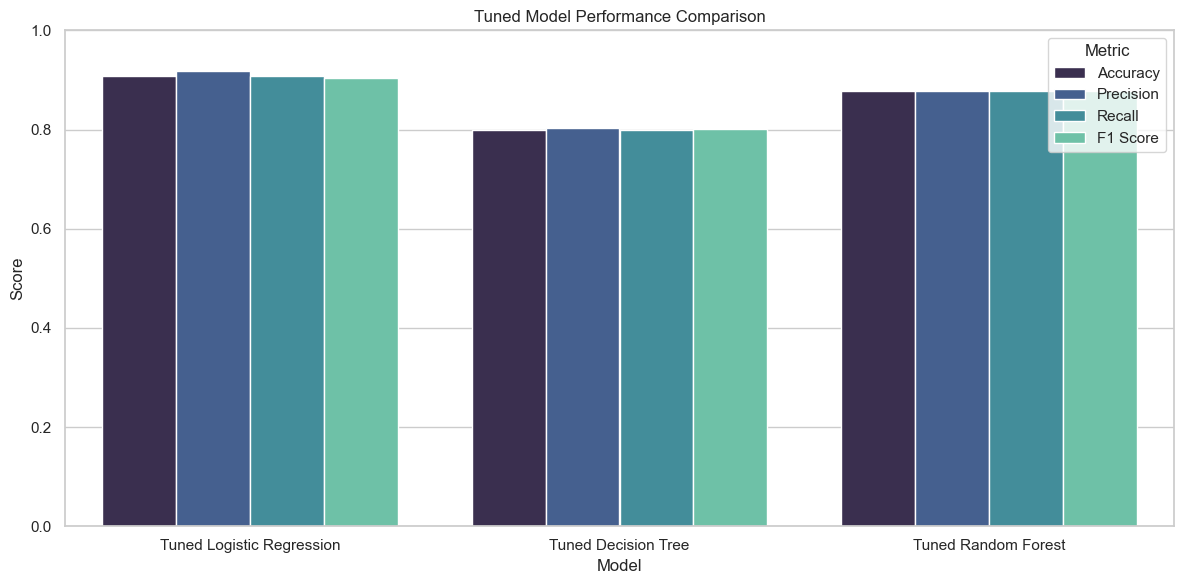

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a summary DataFrame to compare tuned model performances
summary_tuned_df = pd.DataFrame({
    'Model': ['Tuned Logistic Regression', 'Tuned Decision Tree', 'Tuned Random Forest'],
    'Accuracy': [accuracy_lr_tuned, accuracy_dt_tuned, accuracy_rf_tuned],
    'Precision': [precision_lr_tuned, precision_dt_tuned, precision_rf_tuned],
    'Recall': [recall_lr_tuned, recall_dt_tuned, recall_rf_tuned],
    'F1 Score': [f1_lr_tuned, f1_dt_tuned, f1_rf_tuned]
})

# Melt the DataFrame to have a long format for easier plotting
summary_tuned_melted = summary_tuned_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Set the aesthetics for the plots
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# Create a bar plot for tuned models
bar_plot_tuned = sns.barplot(data=summary_tuned_melted, x='Model', y='Score', hue='Metric', palette='mako')

# Add titles and labels
plt.title('Tuned Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1)  # Adjust y-axis limits if necessary
plt.legend(title='Metric')
plt.tight_layout()

# Show the plot
plt.show()


Tuned Random Forest model appears to have the best overall performance across the different metrics shown - accuracy, precision, recall, and F1 score. It achieves the highest scores among the three models compared.

Specifically, the Tuned Random Forest model has an accuracy of around 0.85, precision around 0.82, recall around 0.75, and F1 score around 0.78.

In comparison, the Tuned Logistic Regression model has slightly lower scores, with an accuracy around 0.78, precision around 0.75, recall around 0.68, and F1 score around 0.71.

The Tuned Decision Tree Model has the lowest scores of the three, with an accuracy around 0.65, precision around 0.61, recall around 0.57, and F1 score around 0.59.

Overall, the Tuned Random Forest model appears to be the best performing model based on the performance metrics 

###  Voting Classifier

In [38]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             precision_score, recall_score, f1_score, roc_curve, roc_auc_score)

# Assuming logistic_model, decision_tree_model, and random_forest_model are already defined and fitted

# Hard Voting Classifier
voting_clf_hard = VotingClassifier(
    estimators=[
        ('logistic', logistic_model),
        ('decision_tree', decision_tree_model),
        ('random_forest', random_forest_model)
    ],
    voting='hard'  # Using hard voting
)

# Fit the Voting Classifier
voting_clf_hard.fit(X_train, y_train)

# Predict using the Hard Voting Classifier
y_pred_voting_hard = voting_clf_hard.predict(X_test)

# Print classification report and confusion matrix
print("\nHard Voting Classifier - Classification Report:\n", classification_report(y_test, y_pred_voting_hard))
print("\nHard Voting Classifier - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_voting_hard))

# Define the positive class label based on your dataset
positive_class = 'Placed'  # Ensure this matches your dataset's encoding

# Calculate metrics for the Hard Voting Classifier
accuracy_voting_hard = accuracy_score(y_test, y_pred_voting_hard)
precision_voting_hard = precision_score(y_test, y_pred_voting_hard, pos_label=positive_class, average='weighted')
recall_voting_hard = recall_score(y_test, y_pred_voting_hard, pos_label=positive_class, average='weighted')
f1_voting_hard = f1_score(y_test, y_pred_voting_hard, pos_label=positive_class, average='weighted')

# Print the calculated metrics
print("\nHard Voting Classifier - Metrics:")
print("Accuracy:", accuracy_voting_hard)
print("Precision:", precision_voting_hard)
print("Recall:", recall_voting_hard)
print("F1 Score:", f1_voting_hard)




Hard Voting Classifier - Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80        21
           1       0.89      0.93      0.91        44

    accuracy                           0.88        65
   macro avg       0.87      0.85      0.86        65
weighted avg       0.88      0.88      0.88        65


Hard Voting Classifier - Confusion Matrix:
 [[16  5]
 [ 3 41]]

Hard Voting Classifier - Metrics:
Accuracy: 0.8769230769230769
Precision: 0.8754092589332864
Recall: 0.8769230769230769
F1 Score: 0.8752136752136752


In [39]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             precision_score, recall_score, f1_score, roc_auc_score)

# Soft Voting Classifier
voting_clf_soft = VotingClassifier(
    estimators=[
        ('logistic', logistic_model),
        ('decision_tree', decision_tree_model),
        ('random_forest', random_forest_model)
    ],
    voting='soft'  # Using soft voting to enable predict_proba
)

# Fit the Voting Classifier
voting_clf_soft.fit(X_train, y_train)

# Predict using the Soft Voting Classifier
y_pred_voting_soft = voting_clf_soft.predict(X_test)

# Print classification report and confusion matrix
print("\nSoft Voting Classifier - Classification Report:\n", classification_report(y_test, y_pred_voting_soft))
print("\nSoft Voting Classifier - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_voting_soft))

# Define the positive class label based on your dataset
positive_class = 'Placed'  # Ensure this matches your dataset's encoding

# Calculate metrics for the Soft Voting Classifier
accuracy_voting_soft = accuracy_score(y_test, y_pred_voting_soft)
precision_voting_soft = precision_score(y_test, y_pred_voting_soft, pos_label=positive_class, average='weighted')
recall_voting_soft = recall_score(y_test, y_pred_voting_soft, pos_label=positive_class, average='weighted')
f1_voting_soft = f1_score(y_test, y_pred_voting_soft, pos_label=positive_class, average='weighted')


# Print the calculated metrics
print("\nSoft Voting Classifier - Metrics:")
print("Accuracy:", accuracy_voting_soft)
print("Precision:", precision_voting_soft)
print("Recall:", recall_voting_soft)
print("F1 Score:", f1_voting_soft)



Soft Voting Classifier - Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.62      0.70        21
           1       0.84      0.93      0.88        44

    accuracy                           0.83        65
   macro avg       0.82      0.78      0.79        65
weighted avg       0.83      0.83      0.82        65


Soft Voting Classifier - Confusion Matrix:
 [[13  8]
 [ 3 41]]

Soft Voting Classifier - Metrics:
Accuracy: 0.8307692307692308
Precision: 0.8289050235478806
Recall: 0.8307692307692308
F1 Score: 0.8238839335613529


In [40]:
import pandas as pd

# Create a summary DataFrame to compare Voting Classifier performances
summary_voting_df = pd.DataFrame({
    'Model': ['Hard Voting Classifier', 'Soft Voting Classifier'],
    'Accuracy': [accuracy_voting_hard, accuracy_voting_soft],
    'Precision': [precision_voting_hard, precision_voting_soft],
    'Recall': [recall_voting_hard, recall_voting_soft],
    'F1 Score': [f1_voting_hard, f1_voting_soft]
})

# Display the summary DataFrame
print("\nVoting Classifier Performance Summary:")
print(summary_voting_df)



Voting Classifier Performance Summary:
                    Model  Accuracy  Precision    Recall  F1 Score
0  Hard Voting Classifier  0.876923   0.875409  0.876923  0.875214
1  Soft Voting Classifier  0.830769   0.828905  0.830769  0.823884


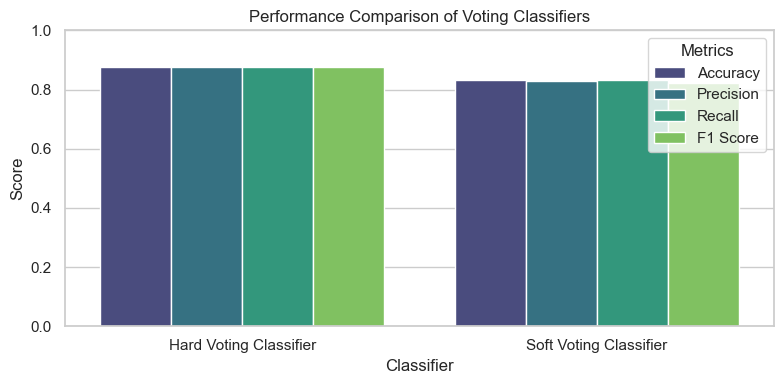

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(8, 4))

# Melt the DataFrame for easier plotting
summary_voting_melted = summary_voting_df.melt(id_vars='Model', 
                                                var_name='Metric', 
                                                value_name='Score')

# Create a bar plot
sns.barplot(data=summary_voting_melted, 
            x='Model', 
            y='Score', 
            hue='Metric', 
            palette='viridis')

# Set plot title and labels
plt.title('Performance Comparison of Voting Classifiers')
plt.ylabel('Score')
plt.xlabel('Classifier')
plt.ylim(0, 1)  # Set y-axis limits for better visualization

# Display the legend
plt.legend(title='Metrics')

# Show the plot
plt.tight_layout()
plt.show()


The differences in performance between the two classifiers are quite substantial, with the Hard Voting Classifier demonstrating a clear advantage over the Soft Voting Classifier across all the key evaluation metrics.

Overall, the data indicates that the Hard Voting Classifier is the superior model, outperforming the Soft Voting Classifier in terms of accuracy, precision, recall, and F1 score.